<a href="https://colab.research.google.com/github/UjjwalaVayuvegula/4545_jenkins_activity/blob/main/Customer_Retention_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Importing Required Libraries



In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings

In [3]:
warnings.filterwarnings("ignore")

# Working on Train Data

# Importing the data and merging 

In [4]:
customerdata=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Customerdata_Train.xlsx")

In [5]:
customerdata

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C16368,CITY2,2012-09-28,0,0,0,Monday
1,C20345,CITY2,2010-12-19,1,1,1,Friday
2,C17683,CITY2,2010-10-03,0,0,0,Wednesday
3,C18647,CITY4,2010-11-27,0,0,0,Monday
4,C36692,CITY2,2009-12-04,1,1,0,Friday
...,...,...,...,...,...,...,...
23815,C23511,CITY2,2018-01-17,1,1,0,Friday
23816,C12197,CITY3,2018-01-17,1,0,1,Friday
23817,C40967,CITY3,2018-01-17,1,0,0,Saturday
23818,C36140,CITY3,2018-01-17,1,1,0,Saturday


In [6]:
emaildata=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Emaildata_Train.xlsx")
emaildata.columns=['CustomerID','Dateofemail','EmailType','timestamp_of_sent','MailOpened','MailClicked']

In [7]:
emaildata

,CustomerID,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked
0,C16368,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C20345,2010-12-19,WelcomeEmail,15:10:30,yes,NotApplicable
2,C17683,2010-10-03,WelcomeEmail,17:12:24,yes,NotApplicable
3,C18647,2010-11-27,WelcomeEmail,16:59:02,yes,NotApplicable
4,C36692,2009-12-04,WelcomeEmail,17:27:22,yes,NotApplicable
...,...,...,...,...,...,...
517667,C36140,2018-01-18,CustomizedEmail,14:04:44,yes,yes
517668,C36140,2018-01-21,CustomizedEmail,16:17:16,no,no
517669,C36140,2018-01-20,CustomizedEmail,12:17:34,yes,yes
517670,C36140,2018-01-20,CustomizedEmail,16:31:18,yes,no


In [8]:
emaildata.duplicated().sum()

0

In [9]:
customerdata.columns

Index(['CustomerID', 'City', 'DateOfRegistration', 'OnlineCommunication',
       'AutomaticRefill', 'DoorstepDelivery', 'PreferredDeliveryDay'],
      dtype='object')

In [10]:
merge1=pd.merge(customerdata,emaildata,on=['CustomerID'],how='left')

In [11]:
merge1

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,15:10:30,yes,no
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,13:54:22,yes,no
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,11:22:32,yes,no
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,14:04:42,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...
517667,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,16:17:16,no,no
517668,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,12:17:34,yes,yes
517669,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no
517670,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes


In [12]:
transaction_data=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/transactionsdata_Train.xlsx")
transaction_data.columns=['CustomerID','DateofOrder','timestamp_of_opening','OrderQuantity']

In [13]:
transaction_data


,CustomerID,DateofOrder,timestamp_of_opening,OrderQuantity
0,C16368,2013-08-11,15:17:52,15
1,C20345,2011-04-01,19:50:00,92
2,C20345,2012-06-29,15:11:56,95
3,C20345,2012-09-22,20:49:10,74
4,C20345,2011-08-23,11:50:26,81
...,...,...,...,...
104750,C12197,2018-01-17,14:35:40,56
104751,C40967,2018-01-17,17:15:20,35
104752,C36140,2018-01-17,13:12:54,47
104753,C36140,2018-01-21,21:12:52,53


In [14]:
transaction_data.dtypes

CustomerID              object
DateofOrder             object
timestamp_of_opening    object
OrderQuantity            int64
dtype: object

In [15]:
merge2=pd.merge(merge1,transaction_data,on=['CustomerID'],how='right')

In [16]:
merge2

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2013-08-11,15:17:52,15
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,15:10:30,yes,no,2013-08-11,15:17:52,15
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,13:54:22,yes,no,2013-08-11,15:17:52,15
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,11:22:32,yes,no,2013-08-11,15:17:52,15
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,14:04:42,yes,no,2013-08-11,15:17:52,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883464,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,16:17:16,no,no,2018-01-21,21:12:52,53
3883465,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,12:17:34,yes,yes,2018-01-21,21:12:52,53
3883466,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no,2018-01-21,21:12:52,53
3883467,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes,2018-01-21,21:12:52,53


In [17]:
train_xls=pd.read_excel("/content/drive/MyDrive/DataForPHD/TrainData/Train.xlsx")

In [18]:
train_xls

,CustomerID,RetentionPotential
0,C37869,Low
1,C33841,Low
2,C29464,Low
3,C28158,Low
4,C22785,High
...,...,...
23815,C14975,Low
23816,C30392,Low
23817,C41735,Low
23818,C26055,Low


In [19]:
data1=pd.merge(merge2,train_xls,how='left')
data1

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity,RetentionPotential
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2013-08-11,15:17:52,15,High
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,15:10:30,yes,no,2013-08-11,15:17:52,15,High
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,13:54:22,yes,no,2013-08-11,15:17:52,15,High
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,11:22:32,yes,no,2013-08-11,15:17:52,15,High
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,14:04:42,yes,no,2013-08-11,15:17:52,15,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883464,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,16:17:16,no,no,2018-01-21,21:12:52,53,Low
3883465,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,12:17:34,yes,yes,2018-01-21,21:12:52,53,Low
3883466,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no,2018-01-21,21:12:52,53,Low
3883467,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes,2018-01-21,21:12:52,53,Low


In [20]:
customer_row = data1.loc[data1['CustomerID'] == 'C12116']

In [21]:
customer_row 

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity,RetentionPotential
2920109,C12116,CITY3,2013-09-23,0,0,0,Friday,2013-09-23,WelcomeEmail,12:51:52,yes,NotApplicable,2013-10-03,13:49:08,38,Low
2920110,C12116,CITY3,2013-09-23,0,0,0,Friday,2013-10-09,CustomizedEmail,10:32:52,no,no,2013-10-03,13:49:08,38,Low
2920111,C12116,CITY3,2013-09-23,0,0,0,Friday,2013-09-30,CustomizedEmail,16:34:10,no,no,2013-10-03,13:49:08,38,Low
2920112,C12116,CITY3,2013-09-23,0,0,0,Friday,2013-10-06,CustomizedEmail,12:20:46,no,no,2013-10-03,13:49:08,38,Low
2920113,C12116,CITY3,2013-09-23,0,0,0,Friday,2013-10-01,CustomizedEmail,17:21:24,no,no,2013-10-03,13:49:08,38,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920200,C12116,CITY3,2013-09-23,0,0,0,Friday,2013-09-27,CustomizedEmail,16:20:48,no,no,2013-10-10,19:50:02,33,Low
2920201,C12116,CITY3,2013-09-23,0,0,0,Friday,2013-10-01,CustomizedEmail,17:50:06,yes,no,2013-10-10,19:50:02,33,Low
2920202,C12116,CITY3,2013-09-23,0,0,0,Friday,2013-09-27,CustomizedEmail,13:26:14,no,no,2013-10-10,19:50:02,33,Low
2920203,C12116,CITY3,2013-09-23,0,0,0,Friday,2013-09-28,CustomizedEmail,13:11:38,no,no,2013-10-10,19:50:02,33,Low


# Preprocessing

In [22]:
data1['DateofOrder'] = pd.to_datetime(data1['DateofOrder'])
data1['Dateofemail'] = pd.to_datetime(data1['Dateofemail'])

In [23]:
# create a new column 'DaysSinceRegistration' by subtracting 'DateOfRegistration' from the current date
current_date = pd.to_datetime('today').normalize()
data1['DaysSinceRegistration'] = (current_date - data1['DateOfRegistration']).dt.days

# create a new column 'DaysSinceLastOrder' by subtracting 'DateOfOrder' from the current date
data1['DaysSinceLastOrder'] = (current_date - data1['DateofOrder']).dt.days


# create a new column 'DaysSinceLastEmail' by subtracting 'DateOfemail' from the current date
data1['DaysSinceLastEmail'] = (current_date - data1['Dateofemail']).dt.days


In [24]:
data1

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity,RetentionPotential,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,15:56:50,yes,NotApplicable,2013-08-11,15:17:52,15,High,3841,3524,3841
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,15:10:30,yes,no,2013-08-11,15:17:52,15,High,3841,3524,3607
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,13:54:22,yes,no,2013-08-11,15:17:52,15,High,3841,3524,3711
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,11:22:32,yes,no,2013-08-11,15:17:52,15,High,3841,3524,3782
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,14:04:42,yes,no,2013-08-11,15:17:52,15,High,3841,3524,3597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883464,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,16:17:16,no,no,2018-01-21,21:12:52,53,Low,1904,1900,1900
3883465,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,12:17:34,yes,yes,2018-01-21,21:12:52,53,Low,1904,1900,1901
3883466,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-20,CustomizedEmail,16:31:18,yes,no,2018-01-21,21:12:52,53,Low,1904,1900,1901
3883467,C36140,CITY3,2018-01-17,1,1,0,Saturday,2018-01-21,CustomizedEmail,14:23:16,yes,yes,2018-01-21,21:12:52,53,Low,1904,1900,1900


In [25]:
registered_dates=customerdata[['CustomerID','DateOfRegistration']]
pd.DataFrame(registered_dates)
registered_dates

,CustomerID,DateOfRegistration
0,C16368,2012-09-28
1,C20345,2010-12-19
2,C17683,2010-10-03
3,C18647,2010-11-27
4,C36692,2009-12-04
...,...,...
23815,C23511,2018-01-17
23816,C12197,2018-01-17
23817,C40967,2018-01-17
23818,C36140,2018-01-17


In [26]:
first_order_dates = data1.groupby('CustomerID')['DateofOrder'].min()
pd.DataFrame(first_order_dates)
first_order_dates = first_order_dates.reset_index()
first_order_dates = first_order_dates.rename(columns={'index': 'CustomerID'})
first_order_dates

,CustomerID,DateofOrder
0,C12116,2013-10-03
1,C12117,2013-12-05
2,C12118,2013-09-10
3,C12119,2013-10-22
4,C12120,2014-01-10
...,...,...
23815,C42185,2011-04-04
23816,C42186,2013-11-23
23817,C42187,2013-09-15
23818,C42188,2011-10-04


In [27]:
diff=pd.merge(registered_dates,first_order_dates,how='inner')
diff

,CustomerID,DateOfRegistration,DateofOrder
0,C16368,2012-09-28,2013-08-11
1,C20345,2010-12-19,2011-04-01
2,C17683,2010-10-03,2010-12-01
3,C18647,2010-11-27,2010-11-29
4,C36692,2009-12-04,2011-09-21
...,...,...,...
23815,C23511,2018-01-17,2018-01-17
23816,C12197,2018-01-17,2018-01-17
23817,C40967,2018-01-17,2018-01-17
23818,C36140,2018-01-17,2018-01-17


In [28]:
diff['diffR&F']=(diff['DateofOrder']- diff['DateOfRegistration']).dt.days
diff

,CustomerID,DateOfRegistration,DateofOrder,diffR&F
0,C16368,2012-09-28,2013-08-11,317
1,C20345,2010-12-19,2011-04-01,103
2,C17683,2010-10-03,2010-12-01,59
3,C18647,2010-11-27,2010-11-29,2
4,C36692,2009-12-04,2011-09-21,656
...,...,...,...,...
23815,C23511,2018-01-17,2018-01-17,0
23816,C12197,2018-01-17,2018-01-17,0
23817,C40967,2018-01-17,2018-01-17,0
23818,C36140,2018-01-17,2018-01-17,0


In [29]:
data1.duplicated().sum()

0

In [30]:
data1.isnull().sum()

CustomerID               0
City                     0
DateOfRegistration       0
OnlineCommunication      0
AutomaticRefill          0
DoorstepDelivery         0
PreferredDeliveryDay     0
Dateofemail              0
EmailType                0
timestamp_of_sent        0
MailOpened               0
MailClicked              0
DateofOrder              0
timestamp_of_opening     0
OrderQuantity            0
RetentionPotential       0
DaysSinceRegistration    0
DaysSinceLastOrder       0
DaysSinceLastEmail       0
dtype: int64

In [31]:
data1.dtypes

CustomerID                       object
City                             object
DateOfRegistration       datetime64[ns]
OnlineCommunication               int64
AutomaticRefill                   int64
DoorstepDelivery                  int64
PreferredDeliveryDay             object
Dateofemail              datetime64[ns]
EmailType                        object
timestamp_of_sent                object
MailOpened                       object
MailClicked                      object
DateofOrder              datetime64[ns]
timestamp_of_opening             object
OrderQuantity                     int64
RetentionPotential               object
DaysSinceRegistration             int64
DaysSinceLastOrder                int64
DaysSinceLastEmail                int64
dtype: object

In [32]:
data1['Dateofemail']=data1['Dateofemail'].astype('str')

In [33]:
data1['Dateofemail']

0          2012-09-28
1          2013-05-20
2          2013-02-05
3          2012-11-26
4          2013-05-30
              ...    
3883464    2018-01-21
3883465    2018-01-20
3883466    2018-01-20
3883467    2018-01-21
3883468    2018-01-17
Name: Dateofemail, Length: 3883469, dtype: object

In [34]:
data1['datetime_str1'] = data1['Dateofemail'] + ' ' + data1['timestamp_of_sent']

In [35]:
# convert the concatenated string to a datetime object
data1['datetimeofsent'] = pd.to_datetime(data1['datetime_str1'], format='%Y-%m-%d %H:%M:%S')
data2=data1.drop(['Dateofemail','timestamp_of_sent','datetime_str1'],axis=1)

data2.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity,RetentionPotential,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,datetimeofsent
0,C16368,CITY2,2012-09-28,0,0,0,Monday,WelcomeEmail,yes,NotApplicable,2013-08-11,15:17:52,15,High,3841,3524,3841,2012-09-28 15:56:50
1,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,2013-08-11,15:17:52,15,High,3841,3524,3607,2013-05-20 15:10:30
2,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,2013-08-11,15:17:52,15,High,3841,3524,3711,2013-02-05 13:54:22
3,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,2013-08-11,15:17:52,15,High,3841,3524,3782,2012-11-26 11:22:32
4,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,2013-08-11,15:17:52,15,High,3841,3524,3597,2013-05-30 14:04:42


In [36]:
data2['DateofOrder']=data2['DateofOrder'].astype('str')

In [37]:
data2['datetime_str2'] = data2['DateofOrder'] + ' ' + data2['timestamp_of_opening']

In [38]:
# convert the concatenated string to a datetime object
data2['datetimeoforder'] = pd.to_datetime(data2['datetime_str2'], format='%Y-%m-%d %H:%M:%S')
data3=data2.drop(['DateofOrder','timestamp_of_opening','datetime_str2'],axis=1)

data3

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity,RetentionPotential,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,datetimeofsent,datetimeoforder
0,C16368,CITY2,2012-09-28,0,0,0,Monday,WelcomeEmail,yes,NotApplicable,15,High,3841,3524,3841,2012-09-28 15:56:50,2013-08-11 15:17:52
1,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,15,High,3841,3524,3607,2013-05-20 15:10:30,2013-08-11 15:17:52
2,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,15,High,3841,3524,3711,2013-02-05 13:54:22,2013-08-11 15:17:52
3,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,15,High,3841,3524,3782,2012-11-26 11:22:32,2013-08-11 15:17:52
4,C16368,CITY2,2012-09-28,0,0,0,Monday,CustomizedEmail,yes,no,15,High,3841,3524,3597,2013-05-30 14:04:42,2013-08-11 15:17:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883464,C36140,CITY3,2018-01-17,1,1,0,Saturday,CustomizedEmail,no,no,53,Low,1904,1900,1900,2018-01-21 16:17:16,2018-01-21 21:12:52
3883465,C36140,CITY3,2018-01-17,1,1,0,Saturday,CustomizedEmail,yes,yes,53,Low,1904,1900,1901,2018-01-20 12:17:34,2018-01-21 21:12:52
3883466,C36140,CITY3,2018-01-17,1,1,0,Saturday,CustomizedEmail,yes,no,53,Low,1904,1900,1901,2018-01-20 16:31:18,2018-01-21 21:12:52
3883467,C36140,CITY3,2018-01-17,1,1,0,Saturday,CustomizedEmail,yes,yes,53,Low,1904,1900,1900,2018-01-21 14:23:16,2018-01-21 21:12:52


In [39]:
data3.dtypes

CustomerID                       object
City                             object
DateOfRegistration       datetime64[ns]
OnlineCommunication               int64
AutomaticRefill                   int64
DoorstepDelivery                  int64
PreferredDeliveryDay             object
EmailType                        object
MailOpened                       object
MailClicked                      object
OrderQuantity                     int64
RetentionPotential               object
DaysSinceRegistration             int64
DaysSinceLastOrder                int64
DaysSinceLastEmail                int64
datetimeofsent           datetime64[ns]
datetimeoforder          datetime64[ns]
dtype: object

In [40]:
data3['time_diff'] = pd.to_timedelta(pd.to_datetime(data3['datetimeoforder']) - data3['datetimeofsent']).astype('timedelta64[h]')

In [41]:
data3.head(1)

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity,RetentionPotential,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,datetimeofsent,datetimeoforder,time_diff
0,C16368,CITY2,2012-09-28,0,0,0,Monday,WelcomeEmail,yes,NotApplicable,15,High,3841,3524,3841,2012-09-28 15:56:50,2013-08-11 15:17:52,7607.0


In [42]:
data4=data3.drop(['datetimeofsent','datetimeoforder'],axis=1)

In [43]:
aggregated_data = data4.groupby(['CustomerID','City','DateOfRegistration','OnlineCommunication','AutomaticRefill','DoorstepDelivery','PreferredDeliveryDay']).agg({'EmailType': lambda x: ', '.join(x),'MailOpened': lambda x: ', '.join(x),
                                                                                                                                                                   'MailClicked': lambda x: ', '.join(x),
                                                                                                                                                                   'time_diff': 'sum','RetentionPotential': lambda x: ', '.join(x),'OrderQuantity':'sum','DaysSinceRegistration':'max','DaysSinceLastOrder':'max','DaysSinceLastEmail':'min'}).reset_index()

In [44]:
aggregated_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,time_diff,RetentionPotential,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail
0,C12116,CITY3,2013-09-23,0,0,0,Friday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, no, no, no, no, no, no, no, no, no, no, y...","NotApplicable, no, no, no, no, no, no, no, no,...",15929.0,"Low, Low, Low, Low, Low, Low, Low, Low, Low, L...",3680,3481,3471,3465
1,C12117,CITY2,2013-12-05,1,0,0,Friday,WelcomeEmail,yes,NotApplicable,2.0,Low,41,3408,3408,3408
2,C12118,CITY4,2013-09-10,1,0,0,Wednesday,WelcomeEmail,yes,NotApplicable,-5.0,High,41,3494,3494,3494
3,C12119,CITY2,2013-04-13,0,0,0,Monday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, no, no, no, no, no, no, no, yes, no, yes,...","NotApplicable, no, no, no, no, no, no, no, no,...",109867.0,"Low, Low, Low, Low, Low, Low, Low, Low, Low, L...",2184,3644,3452,3453
4,C12120,CITY3,2014-01-10,1,0,0,Tuesday,WelcomeEmail,yes,NotApplicable,1.0,Low,31,3372,3372,3372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C42185,CITY2,2011-03-03,0,0,0,Tuesday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, no, no, no, no, no, yes, no, no, no, no, ...","NotApplicable, no, no, no, no, no, no, no, no,...",372759.0,"Low, Low, Low, Low, Low, Low, Low, Low, Low, L...",58960,4416,4384,4114
23816,C42186,CITY4,2013-11-23,1,0,0,Friday,WelcomeEmail,yes,NotApplicable,-3.0,High,46,3420,3420,3420
23817,C42187,CITY2,2013-09-15,1,0,0,Tuesday,WelcomeEmail,yes,NotApplicable,-5.0,High,41,3489,3489,3489
23818,C42188,CITY4,2011-10-04,0,0,0,Friday,WelcomeEmail,yes,NotApplicable,8.0,Low,51,4201,4201,4201


In [46]:
customer_row = data1.loc[data1['CustomerID'] == 'C16368']

In [47]:
customer_row.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,...,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity,RetentionPotential,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,datetime_str1,datetimeofsent
0,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-09-28,WelcomeEmail,15:56:50,...,NotApplicable,2013-08-11,15:17:52,15,High,3841,3524,3841,2012-09-28 15:56:50,2012-09-28 15:56:50
1,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-20,CustomizedEmail,15:10:30,...,no,2013-08-11,15:17:52,15,High,3841,3524,3607,2013-05-20 15:10:30,2013-05-20 15:10:30
2,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-02-05,CustomizedEmail,13:54:22,...,no,2013-08-11,15:17:52,15,High,3841,3524,3711,2013-02-05 13:54:22,2013-02-05 13:54:22
3,C16368,CITY2,2012-09-28,0,0,0,Monday,2012-11-26,CustomizedEmail,11:22:32,...,no,2013-08-11,15:17:52,15,High,3841,3524,3782,2012-11-26 11:22:32,2012-11-26 11:22:32
4,C16368,CITY2,2012-09-28,0,0,0,Monday,2013-05-30,CustomizedEmail,14:04:42,...,no,2013-08-11,15:17:52,15,High,3841,3524,3597,2013-05-30 14:04:42,2013-05-30 14:04:42


In [48]:
customer_row = aggregated_data.loc[aggregated_data['CustomerID'] == 'C16368']

In [49]:
customer_row

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,time_diff,RetentionPotential,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail
3349,C16368,CITY2,2012-09-28,0,0,0,Monday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, yes, yes, yes, yes, yes, yes, yes, yes, y...","NotApplicable, no, no, no, no, no, no, no, no,...",115157.0,"High, High, High, High, High, High, High, High...",450,3841,3524,3541


In [50]:
EmailType = set()
MailOpened = set()
MailClicked = set()
RetentionPotential = set()

for row in aggregated_data.itertuples():
    EmailType.update(row.EmailType.split(', '))
    MailOpened.update(row.MailOpened.split(', '))
    MailClicked.update(row.MailClicked.split(', '))
    RetentionPotential.update(row.RetentionPotential.split(', '))

# Create new columns for each email, timestamp, and date
for email in EmailType:
    aggregated_data[email] = aggregated_data['EmailType'].str.count(email).astype(int)
for open in MailOpened:
    aggregated_data[open] = aggregated_data['MailOpened'].str.count(open).astype(int)
for click in MailClicked:
    aggregated_data[click] = aggregated_data['MailClicked'].str.count(click).astype(int)
for P in RetentionPotential:
    aggregated_data[P] = aggregated_data['RetentionPotential'].str.count(P).astype(int)

# Drop the original columns containing the lists
aggregated_data = aggregated_data.drop(['EmailType','MailOpened','MailClicked','RetentionPotential'], axis=1)

In [51]:
aggregated_data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,WelcomeEmail,no,yes,NotApplicable,High,Low,Medium
0,C12116,CITY3,2013-09-23,0,0,0,Friday,15929.0,3680,3481,3471,3465,93,3,87,6,3,0,96,0
1,C12117,CITY2,2013-12-05,1,0,0,Friday,2.0,41,3408,3408,3408,0,1,0,0,1,0,1,0
2,C12118,CITY4,2013-09-10,1,0,0,Wednesday,-5.0,41,3494,3494,3494,0,1,0,0,1,1,0,0
3,C12119,CITY2,2013-04-13,0,0,0,Monday,109867.0,2184,3644,3452,3453,41,1,37,4,1,0,42,0
4,C12120,CITY3,2014-01-10,1,0,0,Tuesday,1.0,31,3372,3372,3372,0,1,0,0,1,0,1,0


In [52]:
customer_row = aggregated_data.loc[aggregated_data['CustomerID'] == 'C12116']

In [53]:
customer_row

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,WelcomeEmail,no,yes,NotApplicable,High,Low,Medium
0,C12116,CITY3,2013-09-23,0,0,0,Friday,15929.0,3680,3481,3471,3465,93,3,87,6,3,0,96,0


In [54]:
aggregated_data=pd.merge(aggregated_data,diff,how='inner')
data3=aggregated_data.drop(['DateOfRegistration','DateOfRegistration','DateofOrder'],axis=1)
data3.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,WelcomeEmail,no,yes,NotApplicable,High,Low,Medium,diffR&F
0,C12116,CITY3,0,0,0,Friday,15929.0,3680,3481,3471,3465,93,3,87,6,3,0,96,0,10
1,C12117,CITY2,1,0,0,Friday,2.0,41,3408,3408,3408,0,1,0,0,1,0,1,0,0
2,C12118,CITY4,1,0,0,Wednesday,-5.0,41,3494,3494,3494,0,1,0,0,1,1,0,0,0
3,C12119,CITY2,0,0,0,Monday,109867.0,2184,3644,3452,3453,41,1,37,4,1,0,42,0,192
4,C12120,CITY3,1,0,0,Tuesday,1.0,31,3372,3372,3372,0,1,0,0,1,0,1,0,0


In [55]:
data3.nunique()

CustomerID               23820
City                         4
OnlineCommunication          2
AutomaticRefill              2
DoorstepDelivery             2
PreferredDeliveryDay         7
time_diff                13082
OrderQuantity             6751
DaysSinceRegistration     2673
DaysSinceLastOrder        2530
DaysSinceLastEmail        2425
CustomizedEmail           1007
WelcomeEmail               150
no                        1002
yes                        357
NotApplicable              150
High                        81
Low                        988
Medium                     175
diffR&F                    793
dtype: int64

In [56]:
# Select columns to encode
columns_to_encode = ['City','PreferredDeliveryDay']

# Perform one hot encoding
one_hot_encoded = pd.get_dummies(data3[columns_to_encode])

# Combine one hot encoded columns with original data
data_encoded = pd.concat([data3,one_hot_encoded], axis=1)

# Remove original categorical columns
data_encoded.drop(data3[columns_to_encode], axis=1, inplace=True)

# View the encoded data
data_encoded.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,C12116,0,0,0,15929.0,3680,3481,3471,3465,93,...,0,1,0,1,0,0,0,0,0,0
1,C12117,1,0,0,2.0,41,3408,3408,3408,0,...,1,0,0,1,0,0,0,0,0,0
2,C12118,1,0,0,-5.0,41,3494,3494,3494,0,...,0,0,1,0,0,0,0,0,0,1
3,C12119,0,0,0,109867.0,2184,3644,3452,3453,41,...,1,0,0,0,1,0,0,0,0,0
4,C12120,1,0,0,1.0,31,3372,3372,3372,0,...,0,1,0,0,0,0,0,0,1,0


In [57]:
data_encoded['time_diff'].fillna('0', inplace=True)

# display the updated DataFrame
data_encoded['time_diff']

0         15929.0
1             2.0
2            -5.0
3        109867.0
4             1.0
           ...   
23815    372759.0
23816        -3.0
23817        -5.0
23818         8.0
23819    166973.0
Name: time_diff, Length: 23820, dtype: float64

In [58]:
#data_encoded=data_encoded.drop(['time_diff','days','time','seconds','WelcomeEmail','NotApplicable'],axis=1)
data_encoded=data_encoded.drop(['WelcomeEmail','NotApplicable'],axis=1)

In [59]:
data_encoded.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,C12116,0,0,0,15929.0,3680,3481,3471,3465,93,...,0,1,0,1,0,0,0,0,0,0
1,C12117,1,0,0,2.0,41,3408,3408,3408,0,...,1,0,0,1,0,0,0,0,0,0
2,C12118,1,0,0,-5.0,41,3494,3494,3494,0,...,0,0,1,0,0,0,0,0,0,1
3,C12119,0,0,0,109867.0,2184,3644,3452,3453,41,...,1,0,0,0,1,0,0,0,0,0
4,C12120,1,0,0,1.0,31,3372,3372,3372,0,...,0,1,0,0,0,0,0,0,1,0


In [60]:
data_encoded['target'] = data_encoded[['High', 'Medium', 'Low']].idxmax(axis=1)
data_encoded['target'] = data_encoded['target'] .map({'High': 'High', 'Medium': 'Medium', 'Low': 'Low'})

# drop the dummy columns
data_encoded.drop(columns=['High', 'Medium', 'Low'], inplace=True)

# display the updated DataFrame
data_encoded

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,...,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday,target
0,C12116,0,0,0,15929.0,3680,3481,3471,3465,93,...,1,0,1,0,0,0,0,0,0,Low
1,C12117,1,0,0,2.0,41,3408,3408,3408,0,...,0,0,1,0,0,0,0,0,0,Low
2,C12118,1,0,0,-5.0,41,3494,3494,3494,0,...,0,1,0,0,0,0,0,0,1,High
3,C12119,0,0,0,109867.0,2184,3644,3452,3453,41,...,0,0,0,1,0,0,0,0,0,Low
4,C12120,1,0,0,1.0,31,3372,3372,3372,0,...,1,0,0,0,0,0,0,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,C42185,0,0,0,372759.0,58960,4416,4384,4114,559,...,0,0,0,0,0,0,0,1,0,Low
23816,C42186,1,0,0,-3.0,46,3420,3420,3420,0,...,0,1,1,0,0,0,0,0,0,High
23817,C42187,1,0,0,-5.0,41,3489,3489,3489,0,...,0,0,0,0,0,0,0,1,0,High
23818,C42188,0,0,0,8.0,51,4201,4201,4201,0,...,0,1,1,0,0,0,0,0,0,Low


In [61]:
scaler=StandardScaler()
data_encoded[['OrderQuantity','diffR&F','time_diff']]=scaler.fit_transform(data_encoded[['OrderQuantity','diffR&F','time_diff']])

In [62]:
#encoder=LabelEncoder()
#data_encoded['target']=encoder.fit_transform(data_encoded['target'])
#data_encoded['target'].nunique()

In [63]:
corrr=data_encoded.corr().abs()
corrr

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,no,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
OnlineCommunication,1.000000,0.176233,0.097039,0.029936,0.044285,0.408492,0.374904,0.334670,0.051050,0.056932,...,0.245872,0.243498,0.043592,0.011216,0.032785,0.060299,0.076378,0.025278,0.002215,0.040291
AutomaticRefill,0.176233,1.000000,0.185477,0.048855,0.069371,0.088651,0.087799,0.091982,0.094841,0.087544,...,0.022940,0.045943,0.067236,0.029188,0.021384,0.010704,0.028694,0.000033,0.021323,0.017589
DoorstepDelivery,0.097039,0.185477,1.000000,0.037204,0.101545,0.058778,0.058375,0.066492,0.097679,0.092742,...,0.103584,0.202634,0.104770,0.010603,0.035351,0.028864,0.015032,0.010627,0.039133,0.007919
time_diff,0.029936,0.048855,0.037204,1.000000,0.576945,0.120210,0.079618,0.021200,0.607547,0.606656,...,0.087957,0.049333,0.029890,0.011070,0.029156,0.018147,0.008128,0.009458,0.001329,0.001546
OrderQuantity,0.044285,0.069371,0.101545,0.576945,1.000000,0.134981,0.123008,0.033294,0.895358,0.897029,...,0.102503,0.070354,0.021440,0.008082,0.045066,0.021936,0.008888,0.010998,0.000596,0.016722
DaysSinceRegistration,0.408492,0.088651,0.058778,0.120210,0.134981,1.000000,0.984724,0.938839,0.154628,0.157234,...,0.226709,0.193425,0.000060,0.001647,0.004872,0.059523,0.015249,0.014087,0.006429,0.025748
DaysSinceLastOrder,0.374904,0.087799,0.058375,0.079618,0.123008,0.984724,1.000000,0.952597,0.140631,0.143365,...,0.210929,0.184793,0.004617,0.001964,0.007448,0.056987,0.018678,0.017014,0.008096,0.025027
DaysSinceLastEmail,0.334670,0.091982,0.066492,0.021200,0.033294,0.938839,0.952597,1.000000,0.045217,0.042563,...,0.162471,0.147362,0.009374,0.003945,0.021618,0.043309,0.020072,0.018757,0.007851,0.029174
CustomizedEmail,0.051050,0.094841,0.097679,0.607547,0.895358,0.154628,0.140631,0.045217,1.000000,0.994705,...,0.108283,0.082158,0.015572,0.007552,0.043473,0.027651,0.012132,0.012261,0.000111,0.011045
no,0.056932,0.087544,0.092742,0.606656,0.897029,0.157234,0.143365,0.042563,0.994705,1.000000,...,0.111062,0.084118,0.016022,0.007545,0.044740,0.027997,0.012354,0.013221,0.000040,0.011092


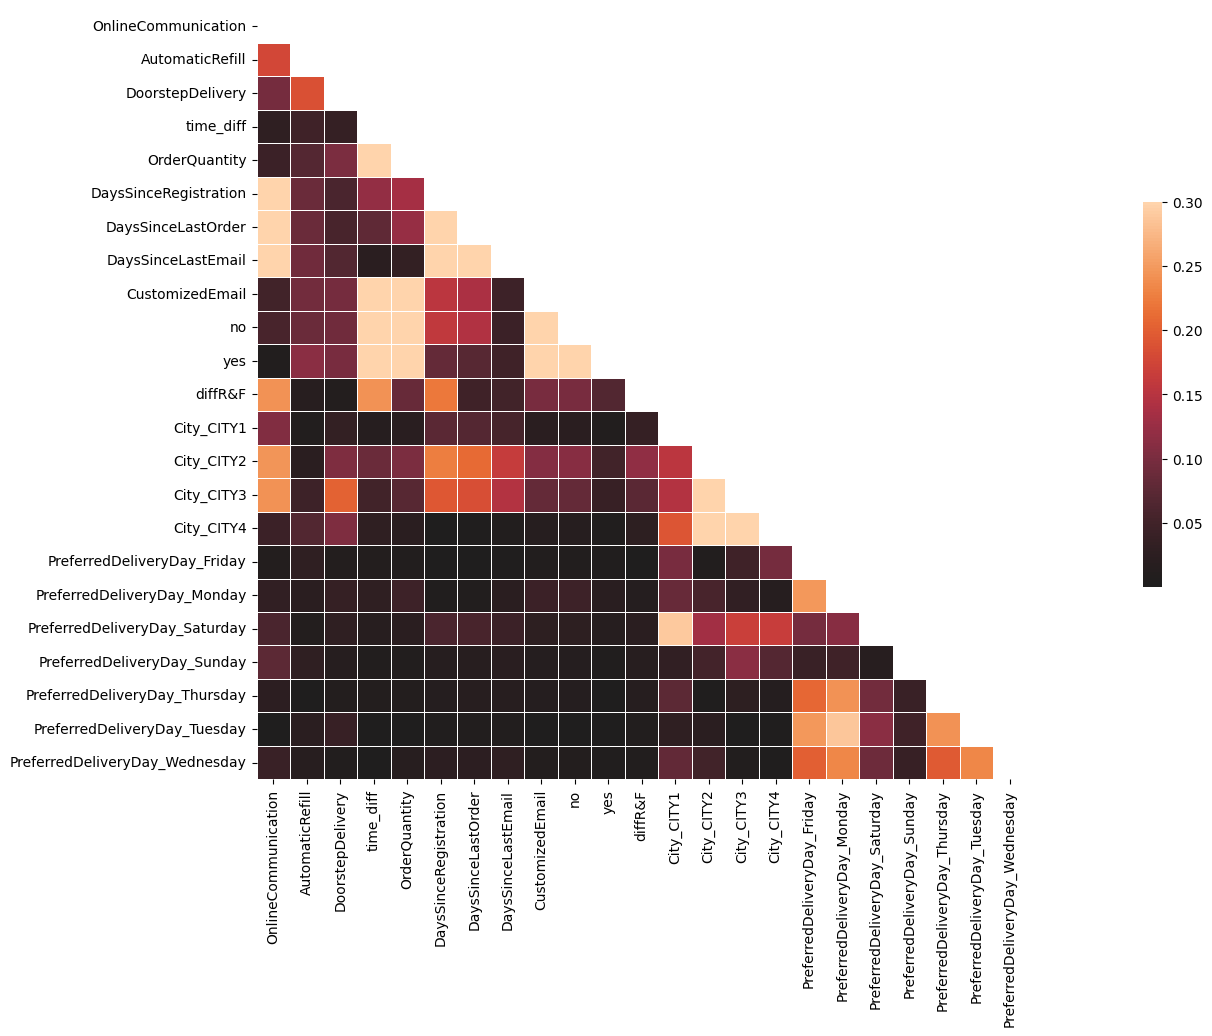

In [64]:
mask = np.triu(np.ones_like(corrr, dtype=bool))
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(corrr, mask=mask,vmax=.3, center=0,
            square=True, linewidths=.60, cbar_kws={"shrink": .5})
plt.show()

# Model Building

In [65]:
data4=data_encoded.drop('CustomerID',axis=1)

In [66]:
X = data4.drop(['target'], axis=1)
y = data4[['target']]

In [67]:
X

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,no,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,0,0,-0.097568,-0.145350,3481,3471,3465,93,87,...,0,1,0,1,0,0,0,0,0,0
1,1,0,0,-0.105614,-0.196239,3408,3408,3408,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,-0.105617,-0.196239,3494,3494,3494,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,-0.050114,-0.166271,3644,3452,3453,41,37,...,1,0,0,0,1,0,0,0,0,0
4,1,0,0,-0.105614,-0.196379,3372,3372,3372,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,0,0,0,0.082688,0.627703,4416,4384,4114,559,559,...,1,0,0,0,0,0,0,0,1,0
23816,1,0,0,-0.105616,-0.196169,3420,3420,3420,0,0,...,0,0,1,1,0,0,0,0,0,0
23817,1,0,0,-0.105617,-0.196239,3489,3489,3489,0,0,...,1,0,0,0,0,0,0,0,1,0
23818,0,0,0,-0.105610,-0.196099,4201,4201,4201,0,0,...,0,0,1,1,0,0,0,0,0,0


In [68]:
y

,target
0,Low
1,Low
2,High
3,Low
4,Low
...,...
23815,Low
23816,High
23817,High
23818,Low


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [70]:
X_train.shape

(19056, 23)

In [71]:
X_test.shape

(4764, 23)

In [72]:
clf = DecisionTreeClassifier(max_depth=7)

In [73]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [74]:
y_pred = clf.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('-------------------------------------------')

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.8916876574307305
-------------------------------------------
Confusion Matrix:
 [[ 452  320   10]
 [  97 3701    1]
 [  28   60   95]]


# GridSearchcv

In [76]:
# Define the parameter grid to search
param_grid = {'max_depth': [2, 3, 5, 7, 9],
              'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_leaf': [1, 2, 4, 6, 8],
              'criterion': ['gini', 'entropy']}

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Create a GridSearchCV object and fit it to the data
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 11}
Best accuracy: 0.8975650371997116


# Working on Test data

# Importing the test data and merging

In [77]:
customer_data=pd.read_excel('/content/drive/MyDrive/DataForPHD/TestData/Customerdata_Test.xlsx')
customer_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay
0,C17838,CITY4,2010-10-22,0,0,0,Thursday
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday
2,C19041,CITY4,2011-01-24,0,1,0,Friday
3,C24069,CITY2,2010-09-18,0,0,0,Wednesday
4,C26718,CITY2,2010-10-02,1,0,0,Monday
...,...,...,...,...,...,...,...
5950,C32947,CITY2,2018-01-17,1,0,0,Friday
5951,C28951,CITY3,2018-01-17,1,0,0,Friday
5952,C38741,CITY3,2018-01-17,1,0,0,Monday
5953,C20407,CITY2,2018-01-17,1,0,0,Friday


In [78]:
email_data=pd.read_excel('/content/drive/MyDrive/DataForPHD/TestData/Emaildata_Test.xlsx')
email_data.columns=['CustomerID','Dateofemail','EmailType','timestamp_of_sent','MailOpened','MailClicked']
email_data

,CustomerID,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked
0,C17838,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable
1,C12403,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable
2,C19041,2011-01-24,WelcomeEmail,14:35:22,yes,NotApplicable
3,C24069,2010-09-18,WelcomeEmail,12:25:26,yes,NotApplicable
4,C26718,2010-10-02,WelcomeEmail,11:55:58,yes,NotApplicable
...,...,...,...,...,...,...
129069,C30169,2018-01-15,CustomizedEmail,13:55:28,no,no
129070,C30169,2018-01-15,CustomizedEmail,15:17:34,no,no
129071,C30169,2018-01-15,CustomizedEmail,10:24:54,yes,yes
129072,C30169,2018-01-15,CustomizedEmail,17:15:26,yes,no


In [79]:
email_data.duplicated().sum()

0

In [80]:
merge1=pd.merge(customer_data,email_data,how='inner')
merge1.shape

(129074, 12)

In [81]:
transaction_data=pd.read_excel('/content/drive/MyDrive/DataForPHD/TestData/transactionsdata_Test.xlsx')
transaction_data.columns=['CustomerID','DateofOrder','timestamp_of_opening','OrderQuantity']
transaction_data

,CustomerID,DateofOrder,timestamp_of_opening,OrderQuantity
0,C17838,2011-03-28,17:41:08,55
1,C12403,2010-10-12,15:58:02,174
2,C12403,2010-11-27,20:13:48,171
3,C12403,2011-12-09,14:34:44,166
4,C12403,2011-03-04,18:20:18,179
...,...,...,...,...
26763,C32947,2018-01-17,21:35:26,41
26764,C28951,2018-01-17,17:05:50,40
26765,C38741,2018-01-17,18:56:16,36
26766,C20407,2018-01-17,10:24:52,75


In [82]:
data=pd.merge(merge1,transaction_data,how='inner')
data.shape

(1013740, 15)

In [83]:
data.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,Dateofemail,EmailType,timestamp_of_sent,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,2010-10-22,WelcomeEmail,16:59:02,yes,NotApplicable,2011-03-28,17:41:08,55
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2010-10-12,15:58:02,174
2,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2010-11-27,20:13:48,171
3,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2011-12-09,14:34:44,166
4,C12403,CITY2,2008-11-17,1,1,0,Wednesday,2008-11-17,WelcomeEmail,12:46:56,yes,NotApplicable,2011-03-04,18:20:18,179


# test preprocessing

In [111]:
data['DateofOrder'] = pd.to_datetime(data['DateofOrder'])
data['Dateofemail'] = pd.to_datetime(data['Dateofemail'])


In [112]:
# create a new column 'DaysSinceRegistration' by subtracting 'DateOfRegistration' from the current date
current_date = pd.to_datetime('today').normalize()
data['DaysSinceRegistration'] = (current_date - data['DateOfRegistration']).dt.days

# create a new column 'DaysSinceLastOrder' by subtracting 'DateOfOrder' from the current date
data['DaysSinceLastOrder'] = (current_date - data['DateofOrder']).dt.days


# create a new column 'DaysSinceLastEmail' by subtracting 'DateOfemail' from the current date
data['DaysSinceLastEmail'] = (current_date - data['Dateofemail']).dt.days


In [113]:
registered_dates=customer_data[['CustomerID','DateOfRegistration']]
pd.DataFrame(registered_dates)
registered_dates

,CustomerID,DateOfRegistration
0,C17838,2010-10-22
1,C12403,2008-11-17
2,C19041,2011-01-24
3,C24069,2010-09-18
4,C26718,2010-10-02
...,...,...
5950,C32947,2018-01-17
5951,C28951,2018-01-17
5952,C38741,2018-01-17
5953,C20407,2018-01-17


In [114]:
first_order_dates = data.groupby('CustomerID')['DateofOrder'].min()
pd.DataFrame(first_order_dates)
first_order_dates = first_order_dates.reset_index()
first_order_dates = first_order_dates.rename(columns={'index': 'CustomerID'})
first_order_dates

,CustomerID,DateofOrder
0,C12121,2017-12-14
1,C12132,2013-10-20
2,C12134,2013-09-18
3,C12135,2018-01-10
4,C12136,2013-10-19
...,...,...
5950,C42153,2012-10-18
5951,C42155,2013-09-14
5952,C42157,2013-09-30
5953,C42167,2016-10-28


In [115]:
diff=pd.merge(registered_dates,first_order_dates,how='inner')
diff

,CustomerID,DateOfRegistration,DateofOrder
0,C17838,2010-10-22,2011-03-28
1,C12403,2008-11-17,2010-10-12
2,C19041,2011-01-24,2011-05-16
3,C24069,2010-09-18,2010-11-09
4,C26718,2010-10-02,2011-01-25
...,...,...,...
5950,C32947,2018-01-17,2018-01-17
5951,C28951,2018-01-17,2018-01-17
5952,C38741,2018-01-17,2018-01-17
5953,C20407,2018-01-17,2018-01-17


In [116]:
diff['DateOfRegistration'] = pd.to_datetime(diff['DateOfRegistration'])

In [117]:
diff['DateofOrder'] = pd.to_datetime(diff['DateofOrder'])
diff['DateOfRegistration'] = pd.to_datetime(diff['DateOfRegistration'])

# Compute the difference between the two dates in days
diff['diffR&F'] = (diff['DateofOrder'] - diff['DateOfRegistration']).dt.days
diff

,CustomerID,DateOfRegistration,DateofOrder,diffR&F
0,C17838,2010-10-22,2011-03-28,157
1,C12403,2008-11-17,2010-10-12,694
2,C19041,2011-01-24,2011-05-16,112
3,C24069,2010-09-18,2010-11-09,52
4,C26718,2010-10-02,2011-01-25,115
...,...,...,...,...
5950,C32947,2018-01-17,2018-01-17,0
5951,C28951,2018-01-17,2018-01-17,0
5952,C38741,2018-01-17,2018-01-17,0
5953,C20407,2018-01-17,2018-01-17,0


In [118]:
data.duplicated().sum()

0

In [119]:
data.isnull().sum()

CustomerID               0
City                     0
DateOfRegistration       0
OnlineCommunication      0
AutomaticRefill          0
DoorstepDelivery         0
PreferredDeliveryDay     0
Dateofemail              0
EmailType                0
timestamp_of_sent        0
MailOpened               0
MailClicked              0
DateofOrder              0
timestamp_of_opening     0
OrderQuantity            0
datetime_str1            0
datetimeofsent           0
DaysSinceRegistration    0
DaysSinceLastOrder       0
DaysSinceLastEmail       0
dtype: int64

In [146]:
data['Dateofemail']=data['Dateofemail'].astype('str')

In [147]:
data['datetime_str1'] = data['Dateofemail'] + ' ' + data['timestamp_of_sent']

In [121]:
# convert the concatenated string to a datetime object
data['datetimeofsent'] = pd.to_datetime(data['datetime_str1'], format='%Y-%m-%d %H:%M:%S')
data1=data.drop(['Dateofemail','timestamp_of_sent','datetime_str1'],axis=1)

data1.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,DateofOrder,timestamp_of_opening,OrderQuantity,datetimeofsent,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable,2011-03-28,17:41:08,55,2010-10-22 16:59:02,4548,4391,4548
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,2010-10-12,15:58:02,174,2008-11-17 12:46:56,5252,4558,5252
2,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,2010-11-27,20:13:48,171,2008-11-17 12:46:56,5252,4512,5252
3,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,2011-12-09,14:34:44,166,2008-11-17 12:46:56,5252,4135,5252
4,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,2011-03-04,18:20:18,179,2008-11-17 12:46:56,5252,4415,5252


In [148]:
data1['DateofOrder']=data1['DateofOrder'].astype('str')

In [149]:
data1['datetime_str2'] = data1['DateofOrder'] + ' ' + data1['timestamp_of_opening']

In [150]:
# convert the concatenated string to a datetime object
data1['datetimeoforder'] = pd.to_datetime(data1['datetime_str2'], format='%Y-%m-%d %H:%M:%S')
data2=data1.drop(['DateofOrder','timestamp_of_opening','datetime_str2'],axis=1)

data2.head()

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity,datetimeofsent,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,datetimeoforder
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable,55,2010-10-22 16:59:02,4548,4391,4548,2011-03-28 17:41:08
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,174,2008-11-17 12:46:56,5252,4558,5252,2010-10-12 15:58:02
2,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,171,2008-11-17 12:46:56,5252,4512,5252,2010-11-27 20:13:48
3,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,166,2008-11-17 12:46:56,5252,4135,5252,2011-12-09 14:34:44
4,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,179,2008-11-17 12:46:56,5252,4415,5252,2011-03-04 18:20:18


In [151]:
data2['time_diff'] = pd.to_timedelta(pd.to_datetime(data2['datetimeoforder']) - data2['datetimeofsent']).astype('timedelta64[h]')

In [152]:
data3=data2.drop(['datetimeofsent','datetimeoforder'],axis=1)

In [153]:
data3

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,time_diff
0,C17838,CITY4,2010-10-22,0,0,0,Thursday,WelcomeEmail,yes,NotApplicable,55,4548,4391,4548,3768.0
1,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,174,5252,4558,5252,16659.0
2,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,171,5252,4512,5252,17767.0
3,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,166,5252,4135,5252,26809.0
4,C12403,CITY2,2008-11-17,1,1,0,Wednesday,WelcomeEmail,yes,NotApplicable,179,5252,4415,5252,20093.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013735,C32947,CITY2,2018-01-17,1,0,0,Friday,WelcomeEmail,yes,NotApplicable,41,1904,1904,1904,8.0
1013736,C28951,CITY3,2018-01-17,1,0,0,Friday,WelcomeEmail,yes,NotApplicable,40,1904,1904,1904,1.0
1013737,C38741,CITY3,2018-01-17,1,0,0,Monday,WelcomeEmail,yes,NotApplicable,36,1904,1904,1904,7.0
1013738,C20407,CITY2,2018-01-17,1,0,0,Friday,WelcomeEmail,yes,NotApplicable,75,1904,1904,1904,-1.0


In [154]:
aggregated_data = data3.groupby(['CustomerID','City','DateOfRegistration','OnlineCommunication','AutomaticRefill','DoorstepDelivery','PreferredDeliveryDay']).agg({'EmailType': lambda x: ', '.join(x),'MailOpened': lambda x: ', '.join(x),
                                                                                                                                                                   'MailClicked': lambda x: ', '.join(x),
                                                                                                                                                                   'time_diff': 'sum','OrderQuantity':'sum','DaysSinceRegistration':'max','DaysSinceLastOrder':'max','DaysSinceLastEmail':'min'}).reset_index()

In [155]:
aggregated_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,EmailType,MailOpened,MailClicked,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail
0,C12121,CITY1,2017-12-04,1,0,0,Friday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, yes, no, no, no, no, yes, no, no, yes, ye...","NotApplicable, no, no, no, no, no, yes, no, no...",2618.0,1300,1948,1938,1939
1,C12132,CITY3,2013-10-20,1,0,0,Tuesday,WelcomeEmail,yes,NotApplicable,3.0,40,3454,3454,3454
2,C12134,CITY3,2013-09-18,1,0,0,Monday,WelcomeEmail,yes,NotApplicable,-3.0,40,3486,3486,3486
3,C12135,CITY3,2017-11-01,1,0,1,Wednesday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, no, yes, no, yes, no, yes, no, no, no, no...","NotApplicable, no, yes, no, yes, no, yes, no, ...",27362.0,1230,1981,1911,1911
4,C12136,CITY2,2013-09-28,1,0,0,Thursday,"WelcomeEmail, CustomizedEmail, CustomizedEmail...","yes, no, yes, no, no, no, no, no, yes, no, no,...","NotApplicable, no, no, no, no, no, no, no, yes...",9738.0,3318,3476,3455,3455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C42153,CITY1,2012-08-28,1,0,0,Sunday,"WelcomeEmail, WelcomeEmail, WelcomeEmail, Welc...","yes, yes, yes, yes, yes, no, no, no, no, no, n...","NotApplicable, NotApplicable, NotApplicable, N...",41481.0,4169,3872,3821,3800
5951,C42155,CITY4,2013-09-14,1,0,0,Thursday,WelcomeEmail,yes,NotApplicable,-2.0,41,3490,3490,3490
5952,C42157,CITY4,2013-09-30,1,0,0,Tuesday,WelcomeEmail,yes,NotApplicable,4.0,41,3474,3474,3474
5953,C42167,CITY2,2016-10-28,0,0,0,Monday,"WelcomeEmail, WelcomeEmail, WelcomeEmail, Welc...","yes, yes, yes, yes, yes, yes, no, no, no, no, ...","NotApplicable, NotApplicable, NotApplicable, N...",8029.0,25100,2350,2350,1978


In [156]:
EmailType = set()
MailOpened = set()
MailClicked = set()

for row in aggregated_data.itertuples():
    EmailType.update(row.EmailType.split(', '))
    MailOpened.update(row.MailOpened.split(', '))
    MailClicked.update(row.MailClicked.split(', '))
    
# Create new columns for each email, timestamp, and date
for email in EmailType:
    aggregated_data[email] = aggregated_data['EmailType'].str.count(email).astype(int)
for open in MailOpened:
    aggregated_data[open] = aggregated_data['MailOpened'].str.count(open).astype(int)
for click in MailClicked:
    aggregated_data[click] = aggregated_data['MailClicked'].str.count(click).astype(int)

# Drop the original columns containing the lists
aggregated_data = aggregated_data.drop(['EmailType','MailOpened','MailClicked'], axis=1)

In [157]:
aggregated_data

,CustomerID,City,DateOfRegistration,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,WelcomeEmail,no,yes,NotApplicable
0,C12121,CITY1,2017-12-04,1,0,0,Friday,2618.0,1300,1948,1938,1939,24,1,21,3,1
1,C12132,CITY3,2013-10-20,1,0,0,Tuesday,3.0,40,3454,3454,3454,0,1,0,0,1
2,C12134,CITY3,2013-09-18,1,0,0,Monday,-3.0,40,3486,3486,3486,0,1,0,0,1
3,C12135,CITY3,2017-11-01,1,0,1,Wednesday,27362.0,1230,1981,1911,1911,29,1,24,5,1
4,C12136,CITY2,2013-09-28,1,0,0,Thursday,9738.0,3318,3476,3455,3455,41,1,40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,C42153,CITY1,2012-08-28,1,0,0,Sunday,41481.0,4169,3872,3821,3800,50,5,45,5,5
5951,C42155,CITY4,2013-09-14,1,0,0,Thursday,-2.0,41,3490,3490,3490,0,1,0,0,1
5952,C42157,CITY4,2013-09-30,1,0,0,Tuesday,4.0,41,3474,3474,3474,0,1,0,0,1
5953,C42167,CITY2,2016-10-28,0,0,0,Monday,8029.0,25100,2350,2350,1978,294,6,288,6,6


In [158]:
aggregated_data=pd.merge(aggregated_data,diff,how='inner')
data3=aggregated_data.drop(['DateOfRegistration','DateOfRegistration','DateofOrder'],axis=1)
data3.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,WelcomeEmail,no,yes,NotApplicable,diffR&F
0,C12121,CITY1,1,0,0,Friday,2618.0,1300,1948,1938,1939,24,1,21,3,1,10
1,C12132,CITY3,1,0,0,Tuesday,3.0,40,3454,3454,3454,0,1,0,0,1,0
2,C12134,CITY3,1,0,0,Monday,-3.0,40,3486,3486,3486,0,1,0,0,1,0
3,C12135,CITY3,1,0,1,Wednesday,27362.0,1230,1981,1911,1911,29,1,24,5,1,70
4,C12136,CITY2,1,0,0,Thursday,9738.0,3318,3476,3455,3455,41,1,40,1,1,21


In [159]:
data3.nunique()

CustomerID               5955
City                        4
OnlineCommunication         2
AutomaticRefill             2
DoorstepDelivery            2
PreferredDeliveryDay        7
time_diff                3707
OrderQuantity            2612
DaysSinceRegistration    1631
DaysSinceLastOrder       1582
DaysSinceLastEmail       1487
CustomizedEmail           532
WelcomeEmail              106
no                        528
yes                       187
NotApplicable             106
diffR&F                   446
dtype: int64

In [160]:
# Select columns to encode
columns_to_encode = ['City','PreferredDeliveryDay']

# Perform one hot encoding
one_hot_encoded = pd.get_dummies(data3[columns_to_encode])

# Combine one hot encoded columns with original data
data_encoded = pd.concat([data3,one_hot_encoded], axis=1)

# Remove original categorical columns
data_encoded.drop(data3[columns_to_encode], axis=1, inplace=True)

# View the encoded data
data_encoded.head()

,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,C12121,1,0,0,2618.0,1300,1948,1938,1939,24,...,0,0,0,1,0,0,0,0,0,0
1,C12132,1,0,0,3.0,40,3454,3454,3454,0,...,0,1,0,0,0,0,0,0,1,0
2,C12134,1,0,0,-3.0,40,3486,3486,3486,0,...,0,1,0,0,1,0,0,0,0,0
3,C12135,1,0,1,27362.0,1230,1981,1911,1911,29,...,0,1,0,0,0,0,0,0,0,1
4,C12136,1,0,0,9738.0,3318,3476,3455,3455,41,...,1,0,0,0,0,0,0,1,0,0


In [161]:
data_encoded.columns

Index(['CustomerID', 'OnlineCommunication', 'AutomaticRefill',
       'DoorstepDelivery', 'time_diff', 'OrderQuantity',
       'DaysSinceRegistration', 'DaysSinceLastOrder', 'DaysSinceLastEmail',
       'CustomizedEmail', 'WelcomeEmail', 'no', 'yes', 'NotApplicable',
       'diffR&F', 'City_CITY1', 'City_CITY2', 'City_CITY3', 'City_CITY4',
       'PreferredDeliveryDay_Friday', 'PreferredDeliveryDay_Monday',
       'PreferredDeliveryDay_Saturday', 'PreferredDeliveryDay_Sunday',
       'PreferredDeliveryDay_Thursday', 'PreferredDeliveryDay_Tuesday',
       'PreferredDeliveryDay_Wednesday'],
      dtype='object')

In [162]:
data_encoded=data_encoded.drop(['WelcomeEmail','NotApplicable'],axis=1)

In [163]:
scaler=StandardScaler()
data_encoded[['OrderQuantity','diffR&F','time_diff']]=scaler.fit_transform(data_encoded[['OrderQuantity','diffR&F','time_diff']])

In [179]:
new=['CustomerID','OnlineCommunication','AutomaticRefill','DoorstepDelivery','time_diff','OrderQuantity','DaysSinceRegistration','DaysSinceLastOrder','DaysSinceLastEmail','CustomizedEmail','no','yes','diffR&F','City_CITY1','City_CITY2','City_CITY3','City_CITY4','PreferredDeliveryDay_Friday',
     'PreferredDeliveryDay_Monday','PreferredDeliveryDay_Saturday','PreferredDeliveryDay_Sunday','PreferredDeliveryDay_Thursday','PreferredDeliveryDay_Tuesday','PreferredDeliveryDay_Wednesday']

In [180]:
test_data = data_encoded.reindex(columns=new)
test_data.head()


,CustomerID,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,C12121,1,0,0,-0.098334,-0.168334,1948,1938,1939,24,...,0,0,0,1,0,0,0,0,0,0
1,C12132,1,0,0,-0.099423,-0.183479,3454,3454,3454,0,...,0,1,0,0,0,0,0,0,1,0
2,C12134,1,0,0,-0.099425,-0.183479,3486,3486,3486,0,...,0,1,0,0,1,0,0,0,0,0
3,C12135,1,0,1,-0.088028,-0.169176,1981,1911,1911,29,...,0,1,0,0,0,0,0,0,0,1
4,C12136,1,0,0,-0.095368,-0.144079,3476,3455,3455,41,...,1,0,0,0,0,0,0,1,0,0


In [166]:
X.head()

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,no,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,0,0,0,-0.097568,-0.145350,3481,3471,3465,93,87,...,0,1,0,1,0,0,0,0,0,0
1,1,0,0,-0.105614,-0.196239,3408,3408,3408,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,-0.105617,-0.196239,3494,3494,3494,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,-0.050114,-0.166271,3644,3452,3453,41,37,...,1,0,0,0,1,0,0,0,0,0
4,1,0,0,-0.105614,-0.196379,3372,3372,3372,0,0,...,0,1,0,0,0,0,0,0,1,0



# Model fitting on unseen data

In [181]:
df=test_data.drop('CustomerID',axis=1)

In [182]:
df

,OnlineCommunication,AutomaticRefill,DoorstepDelivery,time_diff,OrderQuantity,DaysSinceRegistration,DaysSinceLastOrder,DaysSinceLastEmail,CustomizedEmail,no,...,City_CITY2,City_CITY3,City_CITY4,PreferredDeliveryDay_Friday,PreferredDeliveryDay_Monday,PreferredDeliveryDay_Saturday,PreferredDeliveryDay_Sunday,PreferredDeliveryDay_Thursday,PreferredDeliveryDay_Tuesday,PreferredDeliveryDay_Wednesday
0,1,0,0,-0.098334,-0.168334,1948,1938,1939,24,21,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,-0.099423,-0.183479,3454,3454,3454,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,-0.099425,-0.183479,3486,3486,3486,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1,0,1,-0.088028,-0.169176,1981,1911,1911,29,24,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,-0.095368,-0.144079,3476,3455,3455,41,40,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,1,0,0,-0.082148,-0.133850,3872,3821,3800,50,45,...,0,0,0,0,0,0,1,0,0,0
5951,1,0,0,-0.099425,-0.183467,3490,3490,3490,0,0,...,0,0,1,0,0,0,0,1,0,0
5952,1,0,0,-0.099422,-0.183467,3474,3474,3474,0,0,...,0,0,1,0,0,0,0,0,1,0
5953,0,0,0,-0.096080,0.117734,2350,2350,1978,294,288,...,1,0,0,0,1,0,0,0,0,0


In [183]:
clf = DecisionTreeClassifier(max_depth=7)

In [184]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [185]:
test_pred = clf.predict(df)

In [186]:
results=pd.DataFrame(test_pred)

In [187]:
results.columns=['RetentionPotential']	

In [188]:
pred = pd.concat([test_data['CustomerID'], results['RetentionPotential']], axis = 1)

In [189]:
pred.set_index('CustomerID')

,RetentionPotential
CustomerID,
C12121,Low
C12132,Medium
C12134,Medium
C12135,Low
C12136,Low
...,...
C42153,Low
C42155,Medium
C42157,Medium


In [190]:
pred.nunique()

CustomerID            5955
RetentionPotential       3
dtype: int64